# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Novas Tecnologias em Banco de Dados</b></center></font>
  
<font size="3"><center>Profa. Dra. Sahudy Montenegro González</center></font>

## <center>Projeto Final</center>

*INTEGRANTES*

**Integrante 01**: João Vitor Averaldo Antunes

**RA**: 813979

**Integrante 02**: Rafael Mori Pinheiro

**RA**: 813851

## Packages e imports

<p> Caso queira instalar todas as dependências para rodar o projeto basta executar a célula abaixo! </p>

In [1]:
# %pip install requests
# %pip install requests_html
# %pip install re
# %pip install asyncio
# %pip install nest_asyncio
# %pip install sqlalchemy
# %pip install io
# %pip install IPython.display
# %pip install bs4
# %pip install lxml_html_clean
# %pip install seaborn

<p>Nesta seção apresentamos e importamos todos as biblotecas utilizadas no projeto.</p>

In [2]:
import pandas as pd
import requests
import pandas as pd
from requests_html import HTMLSession, AsyncHTMLSession
import re
import asyncio
import nest_asyncio
from sqlalchemy import create_engine
import numpy as np
import logging
from bs4 import BeautifulSoup

nest_asyncio.apply()

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

---

### PIB
DataFrame para o PIB_Per_Capita

In [3]:
# Fetch the data.
df_pib_per_capita = pd.read_csv("https://ourworldindata.org/grapher/gdp-per-capita-worldbank.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/gdp-per-capita-worldbank.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# --> Tratamento <-- #
# Exemplo de leitura (caso seja um CSV)
# df_pib = pd.read_csv('pib_per_capita.csv')

# Renomeia a coluna para ficar consistente com o seu modelo
df_pib_per_capita.rename(columns={'ny_gdp_pcap_pp_kd': 'PIB_Per_Capita'}, inplace=True)

# Converte as colunas para os tipos corretos
df_pib_per_capita['Year'] = df_pib_per_capita['Year'].astype(int)
df_pib_per_capita['PIB_Per_Capita'] = pd.to_numeric(df_pib_per_capita['PIB_Per_Capita'], errors='coerce')

# Opcional: remover linhas com valores ausentes ou preenchê-los conforme a estratégia adotada
df_pib_per_capita.dropna(subset=['PIB_Per_Capita'], inplace=True)

display(df_pib_per_capita)


,Entity,Code,Year,PIB_Per_Capita
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182
...,...,...,...,...
7058,Zimbabwe,ZWE,2019,3294.8062
7059,Zimbabwe,ZWE,2020,2987.2698
7060,Zimbabwe,ZWE,2021,3184.7854
7061,Zimbabwe,ZWE,2022,3323.1218


### Acesso Educacao
DataFrame para o Acesso_Educacao

In [4]:
# Fetch the data.
df_acesso_educacao = pd.read_csv("https://ourworldindata.org/grapher/learning-outcomes-vs-gdp-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/learning-outcomes-vs-gdp-per-capita.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# --> Tratamento <-- #
# Suponha que o dataframe se chame df_educacao
# df_educacao = pd.read_csv('acesso_educacao.csv')

# Converte o ano para inteiro
df_acesso_educacao['Year'] = df_acesso_educacao['Year'].astype(int)

# Converter a coluna de scores para numérico
df_acesso_educacao['harmonized_test_scores'] = pd.to_numeric(df_acesso_educacao['harmonized_test_scores'], errors='coerce')

# Remover valores ausentes (ou aplicar outra estratégia de preenchimento)
df_acesso_educacao.dropna(subset=['harmonized_test_scores'], inplace=True)

# Normaliza os scores para gerar um percentual
min_score = df_acesso_educacao['harmonized_test_scores'].min()
max_score = df_acesso_educacao['harmonized_test_scores'].max()

df_acesso_educacao['Acesso_Educacao'] = ((df_acesso_educacao['harmonized_test_scores'] - min_score) / (max_score - min_score)) * 100

# Se necessário, selecione apenas as colunas de interesse para o merge posterior
df_acesso_educacao = df_acesso_educacao[['Entity', 'Code', 'Year', 'Acesso_Educacao']]

display(df_acesso_educacao)

,Entity,Code,Year,Acesso_Educacao
0,Afghanistan,AFG,2017,18.139005
1,Afghanistan,AFG,2018,18.051639
2,Afghanistan,AFG,2020,18.051639
604,Albania,ALB,2010,33.434287
605,Albania,ALB,2017,44.943048
...,...,...,...,...
58980,Zambia,ZMB,2020,19.276526
59238,Zimbabwe,ZWE,2010,32.337201
59239,Zimbabwe,ZWE,2017,32.989894
59240,Zimbabwe,ZWE,2018,33.040177


### Expectativa de Vida
DataFrame para a Expectativa_Vida

In [5]:
# Fetch the data.
df_expectativa_vida = pd.read_csv("https://ourworldindata.org/grapher/life-expectancy.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/life-expectancy.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# --> Tratamento <-- #
# Suponha que o dataframe se chame df_vida
# df_vida = pd.read_csv('expectativa_vida.csv')

# Renomeia a coluna para ficar consistente com o modelo
df_expectativa_vida.rename(columns={'life_expectancy_0__sex_total__age_0': 'Expectativa_Vida'}, inplace=True)

# Converte o ano para inteiro e a expectativa para numérico
df_expectativa_vida['Year'] = df_expectativa_vida['Year'].astype(int)
df_expectativa_vida['Expectativa_Vida'] = pd.to_numeric(df_expectativa_vida['Expectativa_Vida'], errors='coerce')

# Tratar valores ausentes, se necessário
df_expectativa_vida.dropna(subset=['Expectativa_Vida'], inplace=True)

df_expectativa_vida.to_csv("expectativa.csv")

display(df_expectativa_vida)


,Entity,Code,Year,Expectativa_Vida
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975
...,...,...,...,...
21560,Zimbabwe,ZWE,2019,61.0603
21561,Zimbabwe,ZWE,2020,61.5300
21562,Zimbabwe,ZWE,2021,60.1347
21563,Zimbabwe,ZWE,2022,62.3601


### Taxa de mortalidade
DataFrame para Taxa_Mortalidade

In [6]:
# Fetch the data.
df_taxa_mortalidade = pd.read_csv('taxa_mortalidade.csv')

# --> Tratamento <-- #
# Suponha que o dataframe se chame df_mortalidade
# df_mortalidade = pd.read_csv('taxa_mortalidade.csv')

# Converte o ano para inteiro (a coluna pode estar em minúsculas)
df_taxa_mortalidade['year'] = df_taxa_mortalidade['year'].astype(int)

# Converte a coluna 'val' para numérico; renomeia para Taxa_Mortalidade
df_taxa_mortalidade['Taxa_Mortalidade'] = pd.to_numeric(df_taxa_mortalidade['val'], errors='coerce')

# Se for necessário transformar um número absoluto em percentual, por exemplo:
# df_mortalidade['Taxa_Mortalidade'] = (df_mortalidade['Taxa_Mortalidade'] / df_populacao['Populacao_Total']) * 100

# Remova linhas com valores ausentes (se apropriado)
df_taxa_mortalidade.dropna(subset=['Taxa_Mortalidade'], inplace=True)

# Seleciona as colunas que serão usadas para o merge
df_taxa_mortalidade = df_taxa_mortalidade[['location_name', 'year', 'Taxa_Mortalidade']]

display(df_taxa_mortalidade)

,location_name,year,Taxa_Mortalidade
0,Iran (Islamic Republic of),1950,1.679013e+07
1,Iran (Islamic Republic of),1951,1.718549e+07
2,Iran (Islamic Republic of),1952,1.760677e+07
3,Iran (Islamic Republic of),1953,1.805103e+07
4,Iran (Islamic Republic of),1954,1.851493e+07
...,...,...,...
14683,Bahrain,2017,1.453405e+06
14684,Bahrain,2018,1.473801e+06
14685,Bahrain,2019,1.494478e+06
14686,Bahrain,2020,1.513957e+06


### Médicos por habitante
DataFrame para Medicos_Por_Habitante

In [7]:
df_medicos_por_habitante = pd.read_csv('medicos_por_habitante.csv')

# --> Tratamento <-- #
# Suponha que o dataframe se chame df_medicos
# df_medicos = pd.read_csv('medicos_por_habitante.csv')

# Converte o ano para inteiro; a coluna de ano pode estar com nome 'Period' ou 'Year'
df_medicos_por_habitante['Period'] = df_medicos_por_habitante['Period'].astype(int)

# Converter a coluna com o valor dos médicos para numérico
df_medicos_por_habitante['Medicos_Por_Habitante'] = pd.to_numeric(df_medicos_por_habitante['Value'], errors='coerce')

# Remover valores ausentes, se necessário
df_medicos_por_habitante.dropna(subset=['Medicos_Por_Habitante'], inplace=True)

# Se necessário, selecione apenas as colunas para o merge
df_medicos_por_habitante = df_medicos_por_habitante[['Location', 'Period', 'Medicos_Por_Habitante']]

display(df_medicos_por_habitante)


,Location,Period,Medicos_Por_Habitante
0,Niger,2023,0.38
1,Papua New Guinea,2023,0.61
2,Central African Republic,2023,0.74
3,Chad,2023,0.85
4,Gambia,2023,0.90
...,...,...,...
3411,Republic of Korea,1990,8.12
3412,Oman,1990,8.17
3413,Türkiye,1990,9.04
3414,Ecuador,1990,9.34


### Em Conflito
DataFrame para Em_Conflito

In [8]:
# Fetch the data.
df_em_conflito = pd.read_csv("https://ourworldindata.org/grapher/civilian-and-combatant-deaths-in-armed-conflicts-based-on-where-they-occurred.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/civilian-and-combatant-deaths-in-armed-conflicts-based-on-where-they-occurred.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# ---> Tratamento <--- #
# Supondo que df_conflito seja o dataframe de conflito:
df_em_conflito['total_deaths'] = (df_em_conflito['number_deaths_civilians__conflict_type_all'] +
                               df_em_conflito['number_deaths_unknown__conflict_type_all'] +
                               df_em_conflito['number_deaths_combatants__conflict_type_all'])

def conflict_level(deaths):
    if deaths < 100:
        return 'Baixo'
    elif deaths < 1000:
        return 'Médio'
    else:
        return 'Alto'

df_em_conflito['Em_Conflito'] = df_em_conflito['total_deaths'].apply(conflict_level)

display(df_em_conflito)


,Entity,Code,Year,number_deaths_civilians__conflict_type_all,number_deaths_unknown__conflict_type_all,number_deaths_combatants__conflict_type_all,total_deaths,Em_Conflito
0,Abkhazia,OWID_ABK,1989,0,0,0,0,Baixo
1,Abkhazia,OWID_ABK,1990,0,0,0,0,Baixo
2,Abkhazia,OWID_ABK,1991,0,0,0,0,Baixo
3,Abkhazia,OWID_ABK,1992,0,0,0,0,Baixo
4,Abkhazia,OWID_ABK,1993,0,0,0,0,Baixo
...,...,...,...,...,...,...,...,...
7170,Zimbabwe,ZWE,2019,0,0,0,0,Baixo
7171,Zimbabwe,ZWE,2020,0,0,0,0,Baixo
7172,Zimbabwe,ZWE,2021,0,0,0,0,Baixo
7173,Zimbabwe,ZWE,2022,0,0,0,0,Baixo


### Religião
DataFrame para Religiões

In [9]:
import pandas as pd
import numpy as np

df_religiao_antigo = pd.read_csv('religiao.csv')

# Remover a coluna de footnotes
df_religiao_antigo = df_religiao_antigo.drop(columns=["Value Footnotes"])
df_religiao_antigo["Entity"] = df_religiao_antigo["Country or Area"].str.lower().str.strip()

# Mapeamento antigo (use o dicionário conforme seu código original)
mapping = {
    # – Agrupamento de agregados ou totais
    "Total": "Não Informado",  # Total é um agregado, não uma religião específica

    # Secular / Não Religioso
    "Atheist": "Secular/Não Religioso",
    "No Religion": "Secular/Não Religioso",
    "Non-believers": "Secular/Não Religioso",
    "No religion, Agnostic, Atheist": "Secular/Não Religioso",
    "Agnostic": "Secular/Não Religioso",
    "Humanist": "Secular/Não Religioso",

    # Cristão – diversas denominações
    "Catholic": "Cristão",
    "Roman Catholic": "Cristão",
    "Other Catholic": "Cristão",
    "Brasilian Apostolic Catholic": "Cristão",
    "Roman Apostolic Catholic": "Cristão",
    "Old Catholic Church": "Cristão",
    "Greek Catholic": "Cristão",
    "Ukrainian Catholic": "Cristão",
    "Evangelical": "Cristão",
    "Other Evangelical Pentecostal": "Cristão",
    "Other Traditional Evangelical": "Cristão",
    "Jehovah Witness": "Cristão",
    "Jehovah's Witnesses": "Cristão",
    "Yeshiva's witness": "Cristão",
    "Moravian": "Cristão",
    "Salvation Army": "Cristão",
    "Church of God": "Cristão",
    "Church of God nos": "Cristão",
    "Christian": "Cristão",
    "Other Christians": "Cristão",
    "Brethren": "Cristão",
    "Brethren in Christ": "Cristão",
    "Anglican": "Cristão",
    "Baptist": "Cristão",
    "Bible Baptist": "Cristão",
    "Congregational": "Cristão",
    "Christian nfd": "Cristão",
    "Presbyterian": "Cristão",
    "Presbyterian and Reformed": "Cristão",
    "Protestant": "Cristão",
    "Other Protestant": "Cristão",
    "Methodist": "Cristão",
    "Pentecostal": "Cristão",
    "Seventh Day Adventist": "Cristão",
    "Adventist": "Cristão",
    "Lutheran": "Cristão",
    "United Church": "Cristão",
    "Non-denominational": "Cristão",
    "Church of Christ": "Cristão",
    "Druze": "Outros",  # Embora alguns considerem o Druze parte do espectro do Oriente Médio, aqui optei por "Outros"
    "Latter Day Saints": "Cristão",
    "Mormon": "Cristão",
    "Latter Day Saints (Mormon)": "Cristão",
    "Church of Jesus Christ of Latter-day Saints": "Cristão",
    "Church of Nazarene": "Cristão",
    "Coptic Orthodox": "Cristão",
    "Eastern Orthodox": "Cristão",
    "Orthodox": "Cristão",
    "Oriental Orthodox": "Cristão",
    "Antiochian Orthodox Christian": "Cristão",
    "Armenian Apostolic": "Cristão",
    "Armenian Orthodox": "Cristão",
    "Greek Oriental": "Cristão",
    "Greek Orthodox": "Cristão",
    "Russian Orthodox": "Cristão",
    "Ukrainian Orthodox": "Cristão",
    "Romanian Orthodox": "Cristão",
    "Serbian Orthodox": "Cristão",
    "Swedenborgian (New Church)": "Cristão",
    "Assyrian Apostolic": "Cristão",
    "Oriental Christian": "Cristão",
    "Christengmeinschaft": "Cristão",
    "Church of England": "Cristão",
    "Mennonite": "Cristão",
    "New Apostolic": "Cristão",
    "Shalom": "Cristão",  # Se aparecer algum termo similar
    "Unitarian": "Outros",  # Unitarian Universalism pode ser classificado como "Outros"
    "Unity-New Thought-Pantheist": "Nova Era",
    "Worldwide Church of God": "Cristão",
    "Brethren Exclusive": "Cristão",
    "Christian Community": "Cristão",
    "Free Christian Community": "Cristão",
    "Assembly of God": "Cristão",
    "Church of Christ Filipinista": "Cristão",
    "Christian Congregation of Brazil": "Cristão",
    "Espiritia": "Cristão",  # Apesar de ser uma doutrina própria, frequentemente está ligada à tradição cristã no Brasil
    "God is Love": "Cristão",
    "Orthodox Catholic": "Cristão",
    "Universal of the Kingdom of God": "Cristão",
    "Messianica": "Cristão",
    "New Testament Church of God": "Cristão",
    "Armeno-Gregorian": "Cristão",
    "Antiochian Orthodox Christian": "Cristão",
    "Associated Gospel": "Cristão",
    "Christadelphian": "Cristão",
    "Christian or Plymouth Brethren": "Cristão",
    "Christian Reformed Church": "Cristão",
    "Church of Nazarene": "Cristão",
    "Doukhobors": "Cristão",
    "Evangelical Free Church": "Cristão",
    "Evangelical Missionary Church": "Cristão",
    "Mission de l'Esprit Saint": "Cristão",
    "Quakers": "Cristão",
    "Serbian Orthodox": "Cristão",
    "Vineyard Christian Fellowship": "Cristão",
    "Other Methodist Churches": "Cristão",
    "Other Orthodox Churches": "Cristão",
    "Other Reformed Church": "Cristão",
    "Apostolic Christian Church": "Cristão",
    "Canadian Reformed Church": "Cristão",
    "Charismatic Renewal": "Cristão",
    "Christian Congregational": "Cristão",
    "Christian and Mission Alliance": "Cristão",
    "Dutch Reformed": "Cristão",
    "Free Methodists": "Cristão",
    "Interdenominational": "Cristão",
    "Protestant nfd": "Cristão",
    "Reorganized Church of Latter-day Saints": "Cristão",
    "Worldwide Church of God": "Cristão",
    "Brethren in Christ": "Cristão",
    "Christians, n.i.e.": "Cristão",
    "Canadian and American Reformed Church": "Cristão",
    "Hutterite": "Cristão",
    "Standard Church": "Cristão",
    "Polish Catholic Church": "Cristão",
    "Apostolic": "Cristão",
    "Cook Islands Christian Church": "Cristão",
    "Holy Spirit": "Cristão",
    "Calvinist": "Cristão",
    "Armenian church": "Cristão",
    "Maronite church": "Cristão",
    "Czechoslovak Hussite Church": "Cristão",
    "Orthodox Church in the Czech Lands": "Cristão",
    "Evangelical United Brethren Church": "Cristão",
    "Silesian Evangelical Church": "Cristão",
    "Other Evangelical Churches": "Cristão",
    "Old Believers": "Cristão",
    "Charismatic Episcopal Church": "Cristão",
    "Christian Free Congregations": "Cristão",
    "Church of Charismatic Fellowship": "Cristão",
    "Church of Christian Fellowship": "Cristão",
    "Russian Catholic Orthodox Church": "Cristão",
    "Ukrainian Greek-Catholic Church": "Cristão",
    "Full Gospel Church": "Cristão",
    "Other Apostolic Churches": "Cristão",
    "Free Church in Finland": "Cristão",
    "Other Lutheran Churches": "Cristão",
    "Roman Catholic Church in Finland": "Cristão",
    "The Greek Orthodox Church in Finland": "Cristão",
    "Christian Orthodox": "Cristão",
    "Church of Ireland": "Cristão",
    "Lapsed Roman Catholic": "Cristão",
    "Church of God of Prophecy": "Cristão",
    "Other Church of God": "Cristão",
    "Church of God in Jamaica": "Cristão",
    "African Instituted Churches": "Cristão",
    "Church of the Foursquare Gospel": "Cristão",
    "All Nations Baptist": "Cristão",
    "Kempsville Presbyterian Church": "Cristão",
    "Protestant Reformed": "Cristão",
    "Protestant Lutheran": "Cristão",
    "Evangelical Lutherans": "Cristão",
    "Evangelical Reformists": "Cristão",
    "Word of Faith": "Cristão",
    "Charismatic Evangelical Church": "Cristão",
    "All Gospel Church": "Cristão",
    "Neuapostolische Kirche": "Cristão",
    "Non-denominational Christian Churches": "Cristão",
    "Ethnic Churches": "Cristão",
    "Christian Tamil": "Cristão",
    "Mission Salut et Guerison": "Cristão",
    "Bible Centered Fellowship": "Cristão",
    "Bread of Life Ministries": "Cristão",
    "Charismatic Full Gospel Ministries": "Cristão",
    "Christ Faith Fellowship": "Cristão",
    "Christ the Living Stone Fellowship": "Cristão",
    "Christ's Commission Fellowship": "Cristão",
    "Christian Brethren": "Cristão",
    "Christian Missions": "Cristão",
    "Church Body of Christ Filipinista": "Cristão",
    "Conservative Baptist Association": "Cristão",
    "Crusaders of the Divine Church of Christ Incorporated": "Cristão",
    "Filipino Assemblies Of The First Born Incorporated": "Cristão",
    "Free Believers In Christ Fellowship": "Cristão",
    "Fundamental Grace Gospel Church Of Christ": "Cristão",
    "General Baptist Churches": "Cristão",
    "Good News Christian Churches": "Cristão",
    "I Am Redeemer and Master Evangelical Church Inc.": "Cristão",
    "Iglesia Filipina Independiente": "Cristão",
    "Iglesia Sa Dios Espiritu Santo Incorporated": "Cristão",
    "International One Way Outreach": "Cristão",
    "Jesus Christ Saves Global Outreach": "Cristão",
    "Jesus is Alive Community Incorporated": "Cristão",
    "Jesus is Lord Church": "Cristão",
    "Jesus Reigns Ministries": "Cristão",
    "Jesus The Anointed One Church": "Cristão",
    "Miracle Life Fellowship International": "Cristão",
    "Miracle Revival Church": "Cristão",
    "Philippine Ecumenical Christian Church": "Cristão",
    "Independent Catholic Church": "Cristão",
    "Victory Chapel Christian Fellowship": "Cristão",
    "Victory Christian Fellowship": "Cristão",
    "Missionary Baptist Churches of the Philippines": "Cristão",
    "Evangelic of Augsburg Affiliation": "Cristão",
    "Old Catholic Mariavite Church": "Cristão",
    "Baptist Union of Poland": "Cristão",
    "Other Eastern Christianity": "Cristão",
    "Evangelic Augsburg Confession": "Cristão",
    "Témoin de Jehovah": "Cristão",

    # Muçulmano – termos relacionados ao islamismo
    "Muslim": "Muçulmano",
    "Islam ": "Muçulmano",
    "Islamic Congregation": "Muçulmano",
    "Sunni Muslims": "Muçulmano",
    "Holi Muslim": "Muçulmano",  # se houver
    "Other Muslims": "Muçulmano",
    "Mohamedan": "Muçulmano",
    "Hoi giao - Muslim": "Muçulmano",
    "Qadiani/Ahmadi": "Muçulmano",
    "Sufi": "Muçulmano",
    "Shiite Islam": "Muçulmano",

    # Judaico – termos relacionados ao judaísmo
    "Jewish": "Judaico",
    "Judaism": "Judaico",
    "Yiddish": "Judaico",
    "Mosaic": "Judaico",
    "Karaite": "Judaico",

    # Hindu
    "Hindu": "Hindu",
    "Hare Rama Hare Krishna": "Hindu",
    "Arya Samajist": "Hindu",
    "Bengali": "Hindu",
    "Society for Krishna Consciousness": "Hindu",
    "Kabir Panthis": "Hindu",
    "Marathi & Marathi Hindu": "Hindu",
    "Puranic": "Hindu",
    "Rajput": "Hindu",
    "Tamil and Tamil Hindu": "Hindu",
    "Telegu and Telegu Hindu": "Hindu",
    "Vaish": "Hindu",
    "Vedic": "Hindu",
    "Other Hindu": "Hindu",
    "Sanatanist": "Hindu",
    "Arya Samajist, Other": "Hindu",
    "Telegu Speaking": "Hindu",

    # Budista
    "Buddhist": "Budista",
    "Zen Buddhist": "Budista",
    "Won Buddhist": "Budista",
    "Phat giao - Buddhist": "Budista",
    "Buddhism/ Sikh": "Budista",  # aqui considerei a parte budista

    # Tradicionais (Religiões indígenas, ancestrais ou locais)
    "Other": "Outros",  # caso genérico, se não se encaixar em outra
    "Pagan": "Tradicionais",
    "Badimo": "Tradicionais",
    "Candomble": "Tradicionais",
    "Umbanda": "Tradicionais",
    "Umbanda e Candomblé": "Tradicionais",
    "Animist": "Tradicionais",
    "Traditional": "Tradicionais",
    "Aboriginal spirituality": "Tradicionais",
    "Taara or Earth Believer": "Tradicionais",
    "Estonian Ancient Belief": "Tradicionais",
    "Tribal": "Tradicionais",
    "African Traditional Belief": "Tradicionais",
    "Orisha": "Tradicionais",
    "Druid": "Tradicionais",
    "Mäori Religion": "Tradicionais",
    "Prakriti": "Tradicionais",

    # Nova Era / Espiritualidade
    "Spiritualist": "Nova Era",
    "Unification": "Nova Era",
    "New Age": "Nova Era",
    "Unity-New Thought-Pantheist": "Nova Era",
    "Pantheism": "Nova Era",
    "Wiccan": "Nova Era",
    "Yoga": "Nova Era",
    "Mahikari": "Nova Era",
    
    # Não Informado (falta de especificação ou respostas evasivas)
    "Not Stated": "Não Informado",
    "Not Specified": "Não Informado",
    "Not Declared": "Não Informado",
    "Refused to answer": "Não Informado",
    "Unknown": "Não Informado",
    "Didn't answer": "Não Informado",
    "Not Asked": "Não Informado",
    "Denomination not specified": "Não Informado",
    "None or Refused": "Não Informado",
    "Non-Apostolic": "Não Informado",  # se não houver outra informação

    # Outros – para os casos que não se encaixam ou são muito específicos
    "Other Religions": "Outros",
    "Other Religions and Persuasions": "Outros",
    "Other Non-Christians": "Outros",
    "Chinese Religions": "Outros",
    "Japanese Religions": "Outros",
    "Zoroastrianism": "Outros",
    "Zoroastrian": "Outros",
    "Gnostic": "Outros",
    "Jains": "Outros",
    "Shinto": "Outros",
    "Unitarian": "Outros",
    "Other Eastern religions": "Outros",
    "Celestial": "Outros",
    "Harriste": "Outros",
    "Oriental": "Outros",
    "Confucian": "Outros",
    "Revived": "Outros",
    "Te Ran": "Outros",
    "Te koaua": "Outros",
    "Balts Believers": "Outros",
    "Church of Scientology": "Outros",
    "Confucianism/Taoism and Other Traditional Chinese": "Outros",
    "Ahir": "Outros",
    "Ahmadhya": "Outros",
    "Aryan": "Outros",
    "Chinese": "Outros",
    "Historics": "Outros",
    "Orientalists' Cults": "Outros",
    "Saio/Zione": "Outros",
    "Bon": "Outros",
    "Kirati": "Outros",
    "Ratana": "Outros",
    "Ibandlalama Nazaretha": "Outros",
    "Bandla Lama Nazaretha": "Outros",
    "Modekngei": "Outros",
    "Mo'ui Fo'ou 'ia Kalaisi": "Outros",
    "Cao daii - Cao Dai": "Outros",
    "Hoa hao - Hoa Hao": "Outros",
    "Ch'ondo-gyo": "Outros",
    "Taejong-gyo": "Outros",
    "Daesoonjillihoi": "Outros",
    "Revival Centres": "Outros",  # se não for explicitamente cristão
    "Things to Come": "Outros",
    "Other Faiths": "Não Informado"
}

mapping[np.nan] = "Não Informado"

# Se desejar excluir totais
df_religiao_antigo = df_religiao_antigo[df_religiao_antigo['Religion'] != 'Total']

# Cria a coluna de classificação (caso seja usada posteriormente)
df_religiao_antigo["Classificacao"] = df_religiao_antigo["Religion"].map(mapping).fillna("Outras")

# Agrega para obter a religião predominante por (Entity, Year)
df_religiao_agg = df_religiao_antigo.loc[
    df_religiao_antigo.groupby(['Entity', 'Year'])['Value'].idxmax()
]
df_religiao_agg = df_religiao_agg[['Entity', 'Year', 'Religion']].copy()
df_religiao_agg.rename(columns={'Religion': 'Religiao_Predominante_Antiga'}, inplace=True)

# --- Carregar CSV novo (com percentuais) ---
df_religiao_novo = pd.read_csv('national.csv')
df_religiao_novo.rename(columns={'state': 'Entity', 'year': 'Year'}, inplace=True)
# Padroniza também os nomes dos países no novo CSV
df_religiao_novo["Entity"] = df_religiao_novo["Entity"].str.lower().str.strip()
df_religiao_novo["Year"] = df_religiao_novo["Year"].astype(int)

# Definir as colunas percentuais de interesse
colunas_religiao_percent = [
    "protestant_percent",
    "romancatholic_percent",
    "easternorthodox_percent",
    "anglican_percent",
    "otherchristianity_percent",
    "judaism_percent",
    "islam_percent",
    "buddhism_percent",
    "hinduism_percent",
    "sikhism_percent",
    "shinto_percent",
    "taoism_percent",
    "jainism_percent",
    "confucianism_percent",
    "animism_percent",
    "noreligion_percent",
    "otherreligion_percent"
]

# Função para obter a coluna com o maior percentual
def obtem_religiao_predominante(row, colunas):
    valores = row[colunas].dropna()
    if len(valores) == 0:
        return None
    return valores.idxmax()

df_religiao_novo["coluna_predominante"] = df_religiao_novo.apply(
    obtem_religiao_predominante, axis=1, colunas=colunas_religiao_percent
)

# Mapeamento das colunas para nomes de religião (exemplo)
mapeia_coluna_para_religiao = {
    "protestant_percent": "Protestante",
    "romancatholic_percent": "Roman Catholic",
    "easternorthodox_percent": "Eastern Orthodox",
    "anglican_percent": "Anglican",
    "otherchristianity_percent": "Cristão (Outros)",
    "judaism_percent": "Judaico",
    "islam_percent": "Muçulmano",
    "buddhism_percent": "Budista",
    "hinduism_percent": "Hindu",
    "sikhism_percent": "Sikh",
    "shinto_percent": "Shintoísta",
    "taoism_percent": "Taoísta",
    "jainism_percent": "Jainista",
    "confucianism_percent": "Confucionista",
    "animism_percent": "Tradicionais/Animista",
    "noreligion_percent": "No Religion",
    "otherreligion_percent": "Outros"
}

df_religiao_novo["Religiao_Predominante_Nova"] = df_religiao_novo["coluna_predominante"].map(mapeia_coluna_para_religiao)
df_religiao_novo_min = df_religiao_novo[["Entity", "Year", "Religiao_Predominante_Nova"]].copy()

# --- Unir as duas fontes de religião ---
df_religiao_unificado = pd.merge(
    df_religiao_agg,
    df_religiao_novo_min,
    on=["Entity", "Year"],
    how="outer"
)

# Unifica os valores: se o novo tiver informação (não vazio), usa-o; senão, o antigo.
def unifica_religiao(row):
    novo = row["Religiao_Predominante_Nova"]
    antigo = row["Religiao_Predominante_Antiga"]
    if pd.notna(novo) and novo != "":
        return novo
    elif pd.notna(antigo) and antigo != "":
        return antigo
    else:
        return np.nan

df_religiao_unificado["Religiao_Predominante_Final"] = df_religiao_unificado.apply(unifica_religiao, axis=1)

# Manter somente as colunas finais desejadas
df_religiao_final = df_religiao_unificado[["Entity", "Year", "Religiao_Predominante_Final"]].rename(
    columns={"Religiao_Predominante_Final": "Religiao_Predominante"}
)

# Exibir amostra e salvar o CSV unificado de religião
print("Amostra do CSV de religião unificado:")
print(df_religiao_final.head())
df_religiao_final.to_csv("df_religiao_unificado.csv", index=False, encoding="utf-8-sig")


Amostra do CSV de religião unificado:
        Entity  Year Religiao_Predominante
0  afghanistan  1945             Muçulmano
1  afghanistan  1950             Muçulmano
2  afghanistan  1955             Muçulmano
3  afghanistan  1960             Muçulmano
4  afghanistan  1965             Muçulmano


### Web Scraping 
Fonte dos dados: https://www.worldometers.info/world-population/

In [10]:
import nest_asyncio
import asyncio
import re
import logging
import pandas as pd
import numpy as np
from io import StringIO
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import sys
import warnings

warnings.filterwarnings("ignore")

# Configuração de logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout), logging.FileHandler('scraping.log')]
)
logger = logging.getLogger(__name__)

# Permite o uso de asyncio em ambientes como Jupyter Notebook
nest_asyncio.apply()

async def fetch_population_table(session):
    """
    Obtém a página principal de "Population by Country" e extrai a tabela via pandas.
    Em paralelo, utiliza BeautifulSoup para capturar o link de cada país.
    Retorna um DataFrame com uma coluna adicional "Country_URL".
    """
    url = "https://www.worldometers.info/world-population/population-by-country/"
    try:
        response = await session.get(url)
        # Extrai a tabela com pd.read_html
        tables = pd.read_html(StringIO(response.text))
        pop_table = None
        for table in tables:
            table.columns = [re.sub(r'\s+', ' ', str(col)).strip() for col in table.columns]
            if any("2024" in col and "Population" in col for col in table.columns):
                pop_table = table
                break
        if pop_table is None:
            logger.error("Tabela de população não encontrada na página principal.")
            return None

        # Extraindo os links via BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        table_html = soup.find("table", {"id": "example2"})
        country_links_dict = {}
        if table_html:
            body_rows = table_html.find("tbody").find_all("tr", recursive=False)
            for row in body_rows:
                cols = row.find_all("td", recursive=False)
                if len(cols) < 2:
                    continue
                a_tag = cols[1].find("a", href=True)
                if a_tag:
                    country_name = a_tag.text.strip()
                    relative_url = a_tag['href'].strip()
                    full_url = "https://www.worldometers.info" + relative_url
                    country_links_dict[country_name] = full_url
        else:
            logger.warning("Tabela HTML com id='example2' não foi localizada; os links não serão inseridos.")

        # Renomeia a coluna com o nome do país para facilitar o merge
        original_country_col = "Country (or dependency)"
        if original_country_col in pop_table.columns:
            pop_table.rename(columns={original_country_col: "Country"}, inplace=True)
        else:
            logger.warning(f"Coluna '{original_country_col}' não encontrada.")

        pop_table["Country_URL"] = pop_table["Country"].map(country_links_dict)
        return pop_table

    except Exception as e:
        logger.error(f"Erro ao obter a tabela de população: {str(e)}")
        return None

async def process_population_data():
    """
    Processa a tabela principal para gerar um DataFrame com:
      - Country
      - Populacao_Total (da coluna "Population (2024)")
      - Taxa_Crescimento (da coluna "Yearly Change")
      - Urban_Percent (da coluna "Urban Pop %")
      - Populacao_Urbana e Populacao_Rural (calculadas)
      - Country_URL (link para a página do país)
    """
    session = AsyncHTMLSession()
    try:
        pop_table = await fetch_population_table(session)
        if pop_table is None:
            return None
        
        logger.info(f"Tabela principal extraída com {len(pop_table)} linhas e colunas: {list(pop_table.columns)}")
        
        pop_table.rename(columns={
            "Population (2024)": "Populacao_Total",
            "Yearly Change": "Taxa_Crescimento",
            "Urban Pop %": "Urban_Percent"
        }, inplace=True, errors='ignore')
        
        if "Populacao_Total" in pop_table.columns:
            pop_table["Populacao_Total"] = (
                pop_table["Populacao_Total"]
                .astype(str)
                .str.replace(",", "", regex=False)
                .astype(int)
            )
        
        def process_numeric(val):
            val_str = str(val).strip()
            if val_str.upper() in ["N.A.", "NA", "NAN", ""]:
                return np.nan
            try:
                return float(val_str.replace("%", ""))
            except Exception:
                return np.nan
        
        if "Taxa_Crescimento" in pop_table.columns:
            pop_table["Taxa_Crescimento"] = pop_table["Taxa_Crescimento"].apply(process_numeric)
        if "Urban_Percent" in pop_table.columns:
            pop_table["Urban_Percent"] = pop_table["Urban_Percent"].apply(process_numeric)
        
        if "Populacao_Total" in pop_table.columns and "Urban_Percent" in pop_table.columns:
            pop_table["Populacao_Urbana"] = (
                (pop_table["Populacao_Total"] * pop_table["Urban_Percent"] / 100)
                .round(0)
                .astype("Int64")
            )
            pop_table["Populacao_Rural"] = pop_table["Populacao_Total"] - pop_table["Populacao_Urbana"]
        
        cols_desejadas = ["Country", "Populacao_Total", "Taxa_Crescimento", 
                          "Urban_Percent", "Populacao_Urbana", "Populacao_Rural", "Country_URL"]
        df_population = pop_table[cols_desejadas].copy()
        return df_population
    except Exception as e:
        logger.error(f"Erro crítico no processamento dos dados populacionais: {str(e)}")
        return None
    finally:
        await session.close()

def process_historical_table(df, country_name):
    """
    Dado o DataFrame extraído da página histórica de um país,
    seleciona (se existirem) apenas as colunas:
      - Year
      - Population (população total)
      - (Taxa de) Crescimento – coluna que contenha "Change" e "%" (taxa de crescimento)
      - Urban_Percent – coluna que contenha "Urban" e "%" (percentual de população urbana)
      - Urban_Population – coluna que contenha "Urban" e "Population" (população urbana)
    Calcula ainda:
      - Rural_Population = Population - Urban_Population
    Retorna um DataFrame com as colunas:
       Country, Year, Population, Growth_Rate, Urban_Percent, Urban_Population, Rural_Population
    """
    # Normaliza os nomes das colunas
    df.columns = [re.sub(r'\s+', ' ', str(col)).strip() for col in df.columns]
    
    col_year = None
    col_population = None
    col_growth = None
    col_urban_percent = None
    col_urban_pop = None
    
    for col in df.columns:
        col_lower = col.lower()
        if "year" in col_lower and col_year is None:
            col_year = col
        elif "population" in col_lower and "urban" not in col_lower and "world" not in col_lower and col_population is None:
            col_population = col
        elif "change" in col_lower and "%" in col_lower and col_growth is None:
            col_growth = col
        elif "urban" in col_lower and "%" in col_lower and col_urban_percent is None:
            col_urban_percent = col
        elif "urban" in col_lower and "population" in col_lower and "%" not in col_lower and col_urban_pop is None:
            col_urban_pop = col
            
    if not all([col_year, col_population, col_growth, col_urban_percent, col_urban_pop]):
        logger.warning(f"Para o país {country_name}, nem todas as colunas foram identificadas: "
                       f"Year: {col_year}, Population: {col_population}, Growth: {col_growth}, "
                       f"Urban Percent: {col_urban_percent}, Urban Pop: {col_urban_pop}.")
    
    cols_to_keep = {}
    if col_year:
        cols_to_keep["Year"] = col_year
    if col_population:
        cols_to_keep["Population"] = col_population
    if col_growth:
        cols_to_keep["Growth_Rate"] = col_growth
    if col_urban_percent:
        cols_to_keep["Urban_Percent"] = col_urban_percent
    if col_urban_pop:
        cols_to_keep["Urban_Population"] = col_urban_pop
        
    df_out = pd.DataFrame()
    for new_col, old_col in cols_to_keep.items():
        if old_col in df.columns:
            df_out[new_col] = df[old_col]
        else:
            df_out[new_col] = np.nan
    
    df_out["Country"] = country_name
    
    # Converte as colunas numéricas removendo vírgulas e símbolos
    for col in ["Population", "Urban_Population"]:
        if col in df_out.columns:
            df_out[col] = (df_out[col]
                           .astype(str)
                           .str.replace(",", "", regex=False)
                           .str.strip())
            df_out[col] = pd.to_numeric(df_out[col], errors='coerce')
    
    for col in ["Urban_Percent", "Growth_Rate"]:
        if col in df_out.columns:
            df_out[col] = (df_out[col]
                           .astype(str)
                           .str.replace("%", "", regex=False)
                           .str.strip())
            df_out[col] = pd.to_numeric(df_out[col], errors='coerce')
    
    if "Year" in df_out.columns:
        df_out["Year"] = pd.to_numeric(df_out["Year"], errors='coerce').astype("Int64")
    
    if "Population" in df_out.columns and "Urban_Population" in df_out.columns:
        df_out["Rural_Population"] = df_out["Population"] - df_out["Urban_Population"]
    else:
        df_out["Rural_Population"] = np.nan
        
    desired_order = ["Country", "Year", "Population", "Growth_Rate", "Urban_Percent", "Urban_Population", "Rural_Population"]
    df_out = df_out[[col for col in desired_order if col in df_out.columns]]
    
    return df_out

async def fetch_country_historical_data(session, country_name, country_url):
    """
    Acessa a página individual do país e extrai a tabela “Population of <país> (2025 and historical)”.
    Em seguida, processa essa tabela para manter somente as colunas de interesse.
    Retorna um DataFrame com os dados históricos (um registro por ano) e com a coluna 'Country'.
    """
    try:
        response = await session.get(country_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Procura por um <h2> cujo texto contenha "Population of" e "historical"
        target_table = None
        for h2 in soup.find_all("h2"):
            txt = h2.get_text().strip()
            if "Population of" in txt and "historical" in txt:
                target_table = h2.find_next("table", {"class": "table-list"})
                break
        
        if target_table is None:
            logger.error(f"Tabela histórica não encontrada para {country_name} ({country_url}).")
            return None
        
        # Lê a tabela com pandas
        df_raw = pd.read_html(str(target_table))[0]
        # Processa a tabela para extrair apenas as colunas desejadas
        df_processed = process_historical_table(df_raw, country_name)
        return df_processed
    except Exception as e:
        logger.error(f"Erro ao extrair dados históricos para {country_name}: {e}")
        return None

async def fetch_all_historical_data():
    """
    A partir do DataFrame principal (obtido via process_population_data),
    acessa o link de cada país e extrai a tabela histórica.
    Retorna um DataFrame consolidado em que cada linha é um registro (Country, Year, ...)
    contendo os dados extraídos (Population, Growth_Rate, Urban_Percent, Urban_Population e Rural_Population).
    """
    session = AsyncHTMLSession()
    try:
        main_df = await process_population_data()
        if main_df is None or main_df.empty:
            logger.error("DataFrame principal com os links dos países está vazio.")
            return None
        
        logger.info(f"Foram encontrados {len(main_df)} países para processar dados históricos.")
        tasks = []
        for _, row in main_df.iterrows():
            country_name = row["Country"]
            country_url = row.get("Country_URL", None)
            if pd.isna(country_url) or not country_url:
                logger.warning(f"URL para {country_name} não encontrada; pulando.")
                continue
            tasks.append(fetch_country_historical_data(session, country_name, country_url))
        
        results = await asyncio.gather(*tasks)
        df_list = [df for df in results if df is not None and not df.empty]
        if df_list:
            df_all = pd.concat(df_list, ignore_index=True)
            return df_all
        else:
            logger.error("Nenhum dado histórico foi extraído.")
            return None
    except Exception as e:
        logger.error(f"Erro crítico ao extrair dados históricos: {e}")
        return None
    finally:
        await session.close()

async def main():
    """
    Função principal que:
      - Extrai o DataFrame principal com os links dos países.
      - Para cada país, acessa seu link e extrai os dados históricos (por ano) 
        mantendo somente as colunas: Population, Growth_Rate, Urban_Percent, Urban_Population;
        calcula Rural_Population (Population - Urban_Population) e inclui o Country.
      - Retorna um dicionário com os DataFrames:
            'Fato_Populacao': dados principais com resumo (incluindo Country_URL)
            'Historico_Pais': dados históricos consolidados (uma linha por país/ano)
    """
    session = AsyncHTMLSession()
    try:
        logger.info("🚀 Iniciando coleta dos dados do Worldometers")
        df_population = await process_population_data()
        logger.info("Dados principais extraídos.")
        
        historical_df = await fetch_all_historical_data()
        
        return {
            'Fato_Populacao': df_population,
            'Historico_Pais': historical_df
        }
    except Exception as e:
        logger.critical(f"Erro crítico: {e}")
        return {
            'Fato_Populacao': pd.DataFrame(),
            'Historico_Pais': pd.DataFrame()
        }
    finally:
        await session.close()

# Execução (em ambiente Jupyter use: await main())
dados = await main()

# Exibe os dados principais (com os links)
if dados['Fato_Populacao'] is not None and not dados['Fato_Populacao'].empty:
    print("=== DADOS POPULACIONAIS PRINCIPAIS ===")
    display(dados['Fato_Populacao'].head(10))
else:
    print("Falha na extração dos dados principais.")

# Exibe o DataFrame consolidado com os dados históricos (um registro por país/ano)
if dados['Historico_Pais'] is not None and not dados['Historico_Pais'].empty:
    print("=== DATAFRAME CONSOLIDADO: UM REGISTRO POR PAÍS/ANO ===")
    display(dados['Historico_Pais'])
    # Opcional: salvar os dados em CSV
    dados['Historico_Pais'].to_csv("historical_population_data.csv", index=False, encoding="utf-8-sig")
    print("Dados históricos salvos em 'historical_population_data.csv'.")
else:
    print("Falha na extração dos dados históricos.")


INFO:__main__:🚀 Iniciando coleta dos dados do Worldometers
INFO:__main__:Tabela principal extraída com 234 linhas e colunas: ['#', 'Country', 'Population (2024)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Country_URL']
INFO:__main__:Dados principais extraídos.
INFO:__main__:Tabela principal extraída com 234 linhas e colunas: ['#', 'Country', 'Population (2024)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Country_URL']
INFO:__main__:Foram encontrados 234 países para processar dados históricos.


=== DADOS POPULACIONAIS PRINCIPAIS ===


,Country,Populacao_Total,Taxa_Crescimento,Urban_Percent,Populacao_Urbana,Populacao_Rural,Country_URL
0,India,1450935791,0.89,37.0,536846243,914089548,https://www.worldometers.info/world-population...
1,China,1419321278,-0.23,66.0,936752043,482569235,https://www.worldometers.info/world-population...
2,United States,345426571,0.57,82.0,283249788,62176783,https://www.worldometers.info/world-population...
3,Indonesia,283487931,0.82,59.0,167257879,116230052,https://www.worldometers.info/world-population...
4,Pakistan,251269164,1.52,34.0,85431516,165837648,https://www.worldometers.info/world-population...
5,Nigeria,232679478,2.10,54.0,125646918,107032560,https://www.worldometers.info/world-population...
6,Brazil,211998573,0.41,91.0,192918701,19079872,https://www.worldometers.info/world-population...
7,Bangladesh,173562364,1.22,42.0,72896193,100666171,https://www.worldometers.info/world-population...
8,Russia,144820423,-0.43,75.0,108615317,36205106,https://www.worldometers.info/world-population...
9,Ethiopia,132059767,2.62,22.0,29053149,103006618,https://www.worldometers.info/world-population...


=== DATAFRAME CONSOLIDADO: UM REGISTRO POR PAÍS/ANO ===


,Country,Year,Population,Growth_Rate,Urban_Percent,Urban_Population,Rural_Population
0,India,2025,1463865525,0.89,37.1,542742539.0,921122986.0
1,India,2024,1450935791,0.89,36.6,530387142.0,920548649.0
2,India,2023,1438069596,0.89,36.0,518239122.0,919830474.0
3,India,2022,1425423212,0.79,35.5,506304869.0,919118343.0
4,India,2020,1402617695,0.98,34.4,483098640.0,919519055.0
...,...,...,...,...,...,...,...
4339,Holy See,1975,733,-0.32,99.3,728.0,5.0
4340,Holy See,1970,745,-3.43,86.4,644.0,101.0
4341,Holy See,1965,887,-0.68,NaN,NaN,NaN
4342,Holy See,1960,918,0.15,98.7,906.0,12.0


Dados históricos salvos em 'historical_population_data.csv'.


## Integração dos DataFrames

In [11]:
############################################
# 1. Leitura e Tratamento dos DataFrames de Origem
############################################

# 1.1 - Dados Históricos
df_hist = dados['Historico_Pais'].copy()
df_hist.rename(columns={
    'Country': 'Entity',
    'Population': 'Populacao_Total',
    'Growth_Rate': 'Taxa_Crescimento',
    'Urban_Population': 'Populacao_Urbana',
    'Rural_Population': 'Populacao_Rural'
}, inplace=True)
df_hist['Entity'] = df_hist['Entity'].str.lower().str.strip()
df_hist['Year'] = df_hist['Year'].astype(int)
df_hist['Populacao_Total'] = df_hist['Populacao_Total'].fillna(0).astype(int)
df_hist['Taxa_Crescimento'] = df_hist['Taxa_Crescimento'].fillna(0.0)
df_hist['Populacao_Urbana'] = df_hist['Populacao_Urbana'].fillna(0).astype(int)
df_hist['Populacao_Rural'] = df_hist['Populacao_Rural'].fillna(0).astype(int)

def padroniza_nome(nome):
    return "" if pd.isna(nome) else nome.strip().lower()

# 1.2 - PIB Per Capita
df_pib_per_capita['Entity'] = df_pib_per_capita['Entity'].apply(padroniza_nome)
df_pib_per_capita['Year'] = df_pib_per_capita['Year'].astype(int)
df_pib_per_capita['PIB_Per_Capita'] = df_pib_per_capita['PIB_Per_Capita'].fillna(0.0)

# 1.3 - Acesso à Educação
df_acesso_educacao['Entity'] = df_acesso_educacao['Entity'].apply(padroniza_nome)
df_acesso_educacao['Year'] = df_acesso_educacao['Year'].astype(int)
df_acesso_educacao['Acesso_Educacao'] = df_acesso_educacao['Acesso_Educacao'].fillna(0.0)

# 1.4 - Expectativa de Vida
df_expectativa_vida['Entity'] = df_expectativa_vida['Entity'].apply(padroniza_nome)
df_expectativa_vida['Year'] = df_expectativa_vida['Year'].astype(int)
df_expectativa_vida['Expectativa_Vida'] = df_expectativa_vida['Expectativa_Vida'].fillna(0.0)

# 1.5 - Taxa de Mortalidade
df_taxa_mortalidade.rename(columns={'location_name': 'Entity', 'year': 'Year'}, inplace=True)
df_taxa_mortalidade['Entity'] = df_taxa_mortalidade['Entity'].apply(padroniza_nome)
df_taxa_mortalidade['Year'] = df_taxa_mortalidade['Year'].astype(int)
df_taxa_mortalidade['Taxa_Mortalidade'] = df_taxa_mortalidade['Taxa_Mortalidade'].fillna(0.0)

# 1.6 - Médicos por Habitante
df_medicos_por_habitante.rename(columns={'Location': 'Entity', 'Period': 'Year'}, inplace=True)
df_medicos_por_habitante['Entity'] = df_medicos_por_habitante['Entity'].apply(padroniza_nome)
df_medicos_por_habitante['Year'] = df_medicos_por_habitante['Year'].astype(int)
df_medicos_por_habitante['Medicos_Por_Habitante'] = df_medicos_por_habitante['Medicos_Por_Habitante'].fillna(0.0)

# 1.7 - Em Conflito
df_em_conflito['Entity'] = df_em_conflito['Entity'].apply(padroniza_nome)
df_em_conflito['Year'] = df_em_conflito['Year'].astype(int)
df_em_conflito['Em_Conflito'] = df_em_conflito['Em_Conflito'].fillna('Baixo')

# 1.8 - Dados de Religião (CSV unificado)
# Se necessário, ajuste o encoding (ex.: encoding="latin1")
df_religiao_final = pd.read_csv("df_religiao_unificado.csv", encoding="utf-8")
df_religiao_final['Entity'] = df_religiao_final['Entity'].str.lower().str.strip()
df_religiao_final['Year'] = df_religiao_final['Year'].astype(int)
df_religiao_final['Religiao_Predominante'] = df_religiao_final['Religiao_Predominante'].fillna("Não Informado")

############################################
# 2. Montar o DataFrame Denormalizado de Fato
############################################

df_fato_temp = df_hist.copy()
df_fato_temp = df_fato_temp.merge(df_pib_per_capita[['Entity','Year','PIB_Per_Capita']], on=['Entity','Year'], how='left')
df_fato_temp = df_fato_temp.merge(df_acesso_educacao[['Entity','Year','Acesso_Educacao']], on=['Entity','Year'], how='left')
df_fato_temp = df_fato_temp.merge(df_expectativa_vida[['Entity','Year','Expectativa_Vida']], on=['Entity','Year'], how='left')
df_fato_temp = df_fato_temp.merge(df_taxa_mortalidade[['Entity','Year','Taxa_Mortalidade']], on=['Entity','Year'], how='left')
df_fato_temp = df_fato_temp.merge(df_medicos_por_habitante[['Entity','Year','Medicos_Por_Habitante']], on=['Entity','Year'], how='left')
df_fato_temp = df_fato_temp.merge(df_em_conflito[['Entity','Year','Em_Conflito']], on=['Entity','Year'], how='left')
df_fato_temp['Em_Conflito'] = df_fato_temp['Em_Conflito'].fillna('Baixo')
df_fato_temp = df_fato_temp.merge(df_religiao_final[['Entity','Year','Religiao_Predominante']], on=["Entity","Year"], how='left')

df_fato_denorm = df_fato_temp[[ 
    'Year','Entity',
    'Populacao_Total','Taxa_Crescimento','Populacao_Urbana','Populacao_Rural',
    'PIB_Per_Capita','Acesso_Educacao','Expectativa_Vida','Taxa_Mortalidade','Medicos_Por_Habitante',
    'Em_Conflito','Religiao_Predominante'
]].copy()

print("Amostra do DataFrame de Fato Denormalizado:")
print(df_fato_denorm.head(10))

############################################
# 3. Criação das Dimensões
############################################

# 3.1 - Dim_Tempo
dim_tempo = pd.DataFrame({'Ano': sorted(df_fato_denorm['Year'].unique())})
dim_tempo['Decada'] = dim_tempo['Ano'].apply(lambda x: (x // 10)*10)
dim_tempo['ID_Tempo'] = np.arange(1, len(dim_tempo)+1)

# 3.2 - Dim_Local
dim_local = df_fato_denorm[['Entity']].drop_duplicates().copy()
dim_local.rename(columns={'Entity': 'Pais'}, inplace=True)
pais_to_continente = {
    "india": "Asia",
    "china": "Asia",
    "united states": "North America",
    "indonesia": "Asia",
    "pakistan": "Asia",
    "nigeria": "Africa",
    "brazil": "South America",
    "bangladesh": "Asia",
    "russia": "Europe/Asia",
    "ethiopia": "Africa",
    "mexico": "North America",
    "japan": "Asia",
    "egypt": "Africa",
    "philippines": "Asia",
    "dr congo": "Africa",
    "vietnam": "Asia",
    "iran": "Asia",
    "turkey": "Europe/Asia",
    "germany": "Europe",
    "thailand": "Asia",
    "united kingdom": "Europe",
    "tanzania": "Africa",
    "france": "Europe",
    "south africa": "Africa",
    "italy": "Europe",
    "kenya": "Africa",
    "myanmar": "Asia",
    "colombia": "South America",
    "south korea": "Asia",
    "sudan": "Africa",
    "uganda": "Africa",
    "spain": "Europe",
    "algeria": "Africa",
    "iraq": "Asia",
    "argentina": "South America",
    "afghanistan": "Asia",
    "yemen": "Asia",
    "canada": "North America",
    "poland": "Europe",
    "morocco": "Africa",
    "angola": "Africa",
    "ukraine": "Europe",
    "uzbekistan": "Asia",
    "malaysia": "Asia",
    "mozambique": "Africa",
    "ghana": "Africa",
    "peru": "South America",
    "saudi arabia": "Asia",
    "madagascar": "Africa",
    "côte d'ivoire": "Africa",
    "nepal": "Asia",
    "cameroon": "Africa",
    "venezuela": "South America",
    "niger": "Africa",
    "australia": "Oceania",
    "north korea": "Asia",
    "syria": "Asia",
    "mali": "Africa",
    "burkina faso": "Africa",
    "taiwan": "Asia",
    "sri lanka": "Asia",
    "malawi": "Africa",
    "zambia": "Africa",
    "kazakhstan": "Asia/Europe",
    "chad": "Africa",
    "chile": "South America",
    "romania": "Europe",
    "somalia": "Africa",
    "senegal": "Africa",
    "guatemala": "North America",
    "netherlands": "Europe",
    "ecuador": "South America",
    "cambodia": "Asia",
    "zimbabwe": "Africa",
    "guinea": "Africa",
    "benin": "Africa",
    "rwanda": "Africa",
    "burundi": "Africa",
    "bolivia": "South America",
    "tunisia": "Africa",
    "south sudan": "Africa",
    "haiti": "North America",
    "belgium": "Europe",
    "jordan": "Asia",
    "dominican republic": "North America",
    "united arab emirates": "Asia",
    "cuba": "North America",
    "honduras": "North America",
    "czech republic (czechia)": "Europe",
    "sweden": "Europe",
    "tajikistan": "Asia",
    "papua new guinea": "Oceania",
    "portugal": "Europe",
    "azerbaijan": "Asia",
    "greece": "Europe",
    "hungary": "Europe",
    "togo": "Africa",
    "israel": "Asia",
    "austria": "Europe",
    "belarus": "Europe",
    "switzerland": "Europe",
    "sierra leone": "Africa",
    "laos": "Asia",
    "turkmenistan": "Asia",
    "hong kong": "Asia",
    "libya": "Africa",
    "kyrgyzstan": "Asia",
    "paraguay": "South America",
    "nicaragua": "North America",
    "bulgaria": "Europe",
    "serbia": "Europe",
    "el salvador": "North America",
    "congo": "Africa",
    "denmark": "Europe",
    "singapore": "Asia",
    "lebanon": "Asia",
    "finland": "Europe",
    "liberia": "Africa",
    "norway": "Europe",
    "slovakia": "Europe",
    "state of palestine": "Asia",
    "central african republic": "Africa",
    "oman": "Asia",
    "ireland": "Europe",
    "new zealand": "Oceania",
    "mauritania": "Africa",
    "costa rica": "North America",
    "kuwait": "Asia",
    "panama": "North America",
    "croatia": "Europe",
    "georgia": "Asia/Europe",
    "eritrea": "Africa",
    "mongolia": "Asia",
    "uruguay": "South America",
    "puerto rico": "North America",
    "bosnia and herzegovina": "Europe",
    "qatar": "Asia",
    "moldova": "Europe",
    "namibia": "Africa",
    "armenia": "Asia/Europe",
    "lithuania": "Europe",
    "jamaica": "North America",
    "albania": "Europe",
    "gambia": "Africa",
    "gabon": "Africa",
    "botswana": "Africa",
    "lesotho": "Africa",
    "guinea-bissau": "Africa",
    "slovenia": "Europe",
    "equatorial guinea": "Africa",
    "latvia": "Europe",
    "north macedonia": "Europe",
    "bahrain": "Asia",
    "trinidad and tobago": "North America",
    "timor-leste": "Asia",
    "estonia": "Europe",
    "cyprus": "Europe",
    "mauritius": "Africa",
    "eswatini": "Africa",
    "djibouti": "Africa",
    "fiji": "Oceania",
    "réunion": "Africa",
    "comoros": "Africa",
    "guyana": "South America",
    "solomon islands": "Oceania",
    "bhutan": "Asia",
    "macao": "Asia",
    "luxembourg": "Europe",
    "montenegro": "Europe",
    "suriname": "South America",
    "western sahara": "Africa",
    "malta": "Europe",
    "maldives": "Asia",
    "micronesia": "Oceania",
    "cabo verde": "Africa",
    "brunei": "Asia",
    "belize": "North America",
    "bahamas": "North America",
    "iceland": "Europe",
    "guadeloupe": "North America",
    "martinique": "North America",
    "vanuatu": "Oceania",
    "mayotte": "Africa",
    "french guiana": "South America",
    "new caledonia": "Oceania",
    "barbados": "North America",
    "french polynesia": "Oceania",
    "sao tome & principe": "Africa",
    "samoa": "Oceania",
    "curaçao": "North America",
    "saint lucia": "North America",
    "guam": "Oceania",
    "kiribati": "Oceania",
    "seychelles": "Africa",
    "grenada": "North America",
    "aruba": "North America",
    "tonga": "Oceania",
    "st. vincent & grenadines": "North America",
    "antigua and barbuda": "North America",
    "u.s. virgin islands": "North America",
    "isle of man": "Europe",
    "andorra": "Europe",
    "cayman islands": "North America",
    "dominica": "North America",
    "bermuda": "North America",
    "greenland": "North America",
    "faeroe islands": "Europe",
    "saint kitts & nevis": "North America",
    "american samoa": "Oceania",
    "turks and caicos": "North America",
    "northern mariana islands": "Oceania",
    "sint maarten": "North America",
    "liechtenstein": "Europe",
    "british virgin islands": "North America",
    "gibraltar": "Europe",
    "monaco": "Europe",
    "marshall islands": "Oceania",
    "san marino": "Europe",
    "caribbean netherlands": "North America",
    "saint martin": "North America",
    "palau": "Oceania",
    "anguilla": "North America",
    "cook islands": "Oceania",
    "nauru": "Oceania",
    "wallis & futuna": "Oceania",
    "saint barthelemy": "North America",
    "tuvalu": "Oceania",
    "saint pierre & miquelon": "North America",
    "saint helena": "Africa",
    "montserrat": "North America",
    "falkland islands": "South America",
    "tokelau": "Oceania",
    "niue": "Oceania",
    "holy see": "Europe"
}
dim_local['Continente'] = dim_local['Pais'].apply(lambda p: pais_to_continente.get(p, 'Desconhecido'))
dim_local['ID_Local'] = np.arange(1, len(dim_local)+1)

# 3.3 - Dim_Religiao (usando o DataFrame de religiões antigo)
# Garantir que exista uma entrada para "Não Informado"
dim_religiao = df_religiao_antigo[['Religion','Classificacao']].drop_duplicates()
dim_religiao['Religion'] = dim_religiao['Religion'].fillna("Não Informado").replace("", "Não Informado")
dim_religiao = dim_religiao.rename(columns={'Religion': 'Nome_Religiao'})
# Se não existir, adiciona uma linha para "Não Informado"
if dim_religiao[dim_religiao['Nome_Religiao'] == "não informado"].empty:
    novo = pd.DataFrame({"Nome_Religiao": ["não informado"], "Classificacao": ["Não Informado"]})
    dim_religiao = pd.concat([dim_religiao, novo], ignore_index=True)
dim_religiao['ID_Religiao'] = np.arange(1, len(dim_religiao)+1)

############################################
# 4. Transformar o DataFrame Denormalizado em DF Fato com Chaves
############################################

# Faz join com Dim_Tempo
df_fato_merge = df_fato_denorm.merge(
    dim_tempo[['ID_Tempo','Ano']],
    left_on='Year', right_on='Ano', how='left'
)
# Faz join com Dim_Local
df_fato_merge = df_fato_merge.merge(
    dim_local[['ID_Local','Pais']],
    left_on='Entity', right_on='Pais', how='left'
)
# Faz join com Dim_Religiao
df_fato_merge = df_fato_merge.merge(
    dim_religiao[['ID_Religiao','Nome_Religiao']],
    left_on='Religiao_Predominante', right_on='Nome_Religiao', how='left'
)

# Se algum registro não encontrou correspondência para a religião, substitua pelo ID de "não informado"
default_id = dim_religiao.loc[dim_religiao['Nome_Religiao'] == "não informado", 'ID_Religiao']
if not default_id.empty:
    default_id = default_id.iloc[0]
else:
    default_id = None  # Teoricamente, sempre teremos essa entrada

df_fato_merge['ID_Religiao'] = df_fato_merge['ID_Religiao'].fillna(default_id)

# Monte o DataFrame final para a Tabela de Fato (sem colunas auxiliares)
df_fact_final = pd.DataFrame({
    'Chave_Tempo': df_fato_merge['ID_Tempo'],
    'Chave_Local': df_fato_merge['ID_Local'],
    'Chave_Religiao': df_fato_merge['ID_Religiao'],
    'Em_Conflito': df_fato_merge['Em_Conflito'],
    'Populacao_Total': df_fato_merge['Populacao_Total'],
    'Populacao_Urbana': df_fato_merge['Populacao_Urbana'],
    'Populacao_Rural': df_fato_merge['Populacao_Rural'],
    'Taxa_Crescimento': df_fato_merge['Taxa_Crescimento'],
    'Expectativa_Vida': df_fato_merge['Expectativa_Vida'],
    'Taxa_Mortalidade': df_fato_merge['Taxa_Mortalidade'],
    'PIB_Per_Capita': df_fato_merge['PIB_Per_Capita'],
    'Acesso_Educacao': df_fato_merge['Acesso_Educacao'],
    'Medicos_Por_Habitante': df_fato_merge['Medicos_Por_Habitante']
})

print("Amostra do DataFrame Final (Fato):")
display(df_fact_final.head(10))
print("Nulos em Chave_Tempo:", df_fact_final['Chave_Tempo'].isnull().sum())
print("Nulos em Chave_Local:", df_fact_final['Chave_Local'].isnull().sum())
print("Nulos em Chave_Religiao:", df_fact_final['Chave_Religiao'].isnull().sum())
print("Nulos em Em_Conflito:", df_fact_final['Em_Conflito'].isnull().sum())

############################################
# 5. Salvar CSVs para Análise (opcional)
############################################

df_fact_final.to_csv("df_fato_final.csv", index=False, encoding="utf-8-sig")
dim_tempo.to_csv("dim_tempo.csv", index=False, encoding="utf-8-sig")
dim_local.to_csv("dim_local.csv", index=False, encoding="utf-8-sig")
dim_religiao.to_csv("dim_religiao.csv", index=False, encoding="utf-8-sig")

Amostra do DataFrame de Fato Denormalizado:
   Year Entity  Populacao_Total  Taxa_Crescimento  Populacao_Urbana  \
0  2025  india       1463865525              0.89         542742539   
1  2024  india       1450935791              0.89         530387142   
2  2023  india       1438069596              0.89         518239122   
3  2022  india       1425423212              0.79         506304869   
4  2020  india       1402617695              0.98         483098640   
5  2015  india       1328024498              1.32         429069459   
6  2010  india       1243481564              1.49         380744554   
7  2005  india       1154676322              1.77         334479406   
8  2000  india       1057922733              1.96         291350282   
9  1995  india        960301044              2.11         255558824   

   Populacao_Rural  PIB_Per_Capita  Acesso_Educacao  Expectativa_Vida  \
0        921122986             NaN              NaN               NaN   
1        920548649          

,Chave_Tempo,Chave_Local,Chave_Religiao,Em_Conflito,Populacao_Total,Populacao_Urbana,Populacao_Rural,Taxa_Crescimento,Expectativa_Vida,Taxa_Mortalidade,PIB_Per_Capita,Acesso_Educacao,Medicos_Por_Habitante
0,23,1,458.0,Baixo,1463865525,542742539,921122986,0.89,NaN,NaN,NaN,NaN,NaN
1,22,1,458.0,Baixo,1450935791,530387142,920548649,0.89,NaN,NaN,NaN,NaN,NaN
2,21,1,458.0,Médio,1438069596,518239122,919830474,0.89,72.0026,NaN,9160.0630,NaN,NaN
3,20,1,458.0,Médio,1425423212,506304869,919118343,0.79,71.6984,NaN,8544.6880,NaN,NaN
4,18,1,458.0,Médio,1402617695,483098640,919519055,0.98,70.1563,1.402362e+09,7399.5310,34.076544,7.23
5,13,1,458.0,Médio,1328024498,429069459,898955039,1.32,69.3260,1.325002e+09,6488.1460,NaN,7.23
6,12,1,16.0,Alto,1243481564,380744554,862737010,1.49,67.1616,1.233548e+09,5059.2827,NaN,NaN
7,11,1,16.0,Alto,1154676322,334479406,820196916,1.77,64.9385,1.133147e+09,3881.9660,NaN,NaN
8,10,1,16.0,Alto,1057922733,291350282,766572451,1.96,62.7492,1.032537e+09,3099.5030,NaN,NaN
9,9,1,16.0,Alto,960301044,255558824,704742220,2.11,60.6295,9.377291e+08,2542.4220,NaN,NaN


Nulos em Chave_Tempo: 0
Nulos em Chave_Local: 0
Nulos em Chave_Religiao: 0
Nulos em Em_Conflito: 0


## PostgreSQL
### Carregamento de dados para o PostgreSQL

In [12]:
# Ajuste conforme sua conexão local ou remota
USER = "postgres"
PASSWORD = "102030"
HOST = "localhost"
PORT = "5432"
DB_NAME = "world_population"

CONN_STRING = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
engine = create_engine(CONN_STRING)

try:
    with engine.connect() as conn:
        print("Conexão estabelecida com sucesso!")
except Exception as e:
    print(f"Erro ao conectar: {e}")

Conexão estabelecida com sucesso!


In [13]:
from sqlalchemy import create_engine, text

create_tables_script = """
DROP TABLE IF EXISTS "Fato_Populacao" CASCADE;
DROP TABLE IF EXISTS "Dim_Religiao" CASCADE;
DROP TABLE IF EXISTS "Dim_Tempo" CASCADE;
DROP TABLE IF EXISTS "Dim_Local" CASCADE;

CREATE TABLE "Dim_Tempo" (
    "ID_Tempo" SERIAL PRIMARY KEY,
    "Ano" INT NOT NULL,
    "Decada" INT NOT NULL
);

CREATE TABLE "Dim_Local" (
    "ID_Local" SERIAL PRIMARY KEY,
    "Pais" VARCHAR(200) NOT NULL,
    "Continente" VARCHAR(200) NOT NULL
);

CREATE TABLE "Dim_Religiao" (
    "ID_Religiao" SERIAL PRIMARY KEY,
    "Nome_Religiao" VARCHAR(200) NOT NULL,
    "Classificacao" VARCHAR(200) NOT NULL
);

-- Como "Chave_Religiao" pode ser substituída pelo ID de "não informado" quando não houver correspondência,
-- ela NÃO deve fazer parte do PK. Assim, o PK é composto por ("Chave_Tempo", "Chave_Local", "Em_Conflito").
CREATE TABLE "Fato_Populacao" (
    "Chave_Tempo" INT NOT NULL,
    "Chave_Local" INT NOT NULL,
    "Chave_Religiao" INT,
    "Em_Conflito" VARCHAR(50) NOT NULL,
    "Populacao_Total" BIGINT,
    "Populacao_Urbana" BIGINT,
    "Populacao_Rural" BIGINT,
    "Taxa_Crescimento" FLOAT,
    "Expectativa_Vida" FLOAT,
    "Taxa_Mortalidade" FLOAT,
    "PIB_Per_Capita" FLOAT,
    "Acesso_Educacao" FLOAT,
    "Medicos_Por_Habitante" FLOAT,
    PRIMARY KEY ("Chave_Tempo", "Chave_Local", "Em_Conflito"),
    FOREIGN KEY ("Chave_Tempo") REFERENCES "Dim_Tempo" ("ID_Tempo"),
    FOREIGN KEY ("Chave_Local") REFERENCES "Dim_Local" ("ID_Local"),
    FOREIGN KEY ("Chave_Religiao") REFERENCES "Dim_Religiao" ("ID_Religiao") ON DELETE SET NULL
);
"""

# Configure a engine (ajuste a string de conexão e, se necessário, o encoding)
engine = create_engine(
    CONN_STRING,
    connect_args={"client_encoding": "utf8"}
)

with engine.connect() as conn:
    conn.execute(text(create_tables_script))
    conn.commit()

# Inserir as dimensões
dim_tempo.to_sql('Dim_Tempo', engine, if_exists='append', index=False)
dim_local.to_sql('Dim_Local', engine, if_exists='append', index=False)
dim_religiao.to_sql('Dim_Religiao', engine, if_exists='append', index=False)

# Inserir os dados da Tabela de Fato
df_fact_final.to_sql('Fato_Populacao', engine, if_exists='append', index=False)

print("Dados inseridos com sucesso!")


Dados inseridos com sucesso!


## Consultas OLAP + Visualização

Consulta 1: Distribuição Religiosa e Impactos Socioeconômicos


,Classificacao,media_pib,media_vida,media_mortalidade
0,Não Informado,23901.012520,65.533169,1.533962e+07
1,Budista,65052.746000,76.844900,4.489272e+06
2,Secular/Não Religioso,22269.518400,65.717180,4.026701e+08
3,Outras,3481.520650,65.937300,3.118466e+04
4,Cristão,22571.876137,66.380016,1.705821e+07
5,Hindu,8383.696061,59.288392,1.912097e+08
6,Muçulmano,30300.954333,76.334867,1.652702e+07


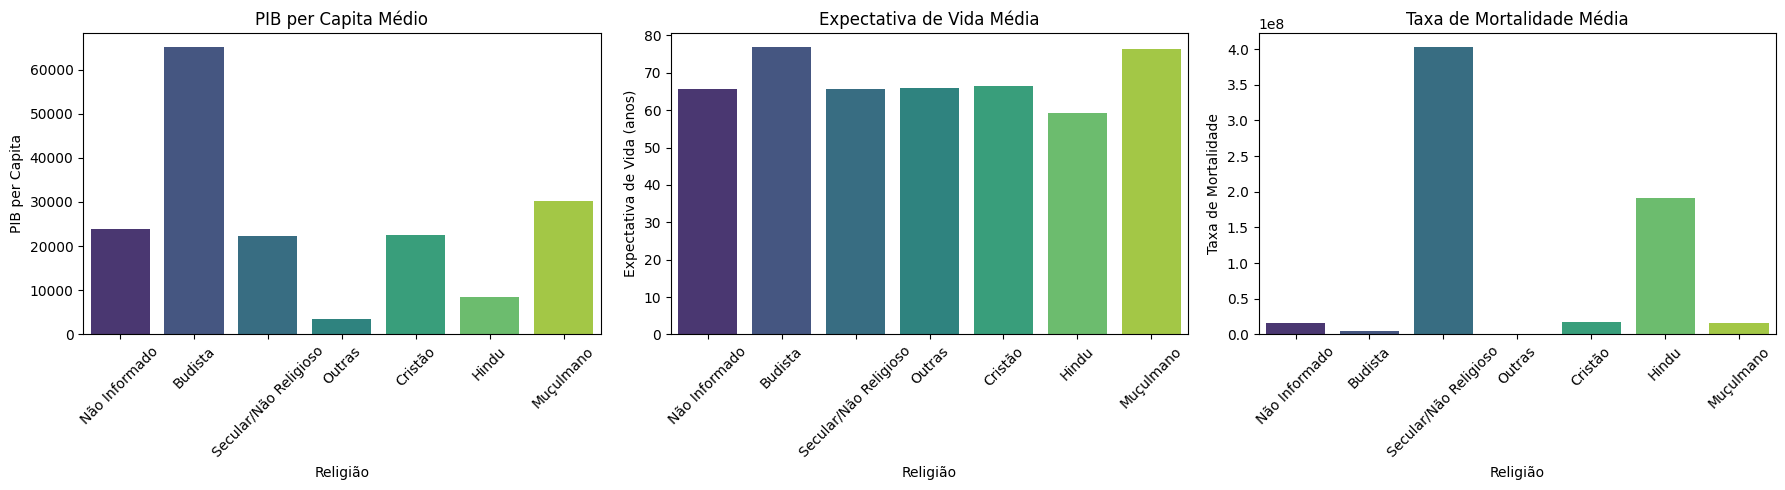

Consulta 2: Tendências Religiosas e Urbanização


,Ano,Classificacao,urban_rate
0,1955,Cristão,47.412461
1,1955,Não Informado,31.225062
2,1955,Hindu,10.812651
3,1955,Secular/Não Religioso,25.742295
4,1960,Não Informado,32.117652
5,1960,Secular/Não Religioso,31.755593
6,1960,Hindu,10.969153
7,1960,Cristão,48.825394
8,1965,Cristão,48.700191
9,1965,Secular/Não Religioso,35.386136


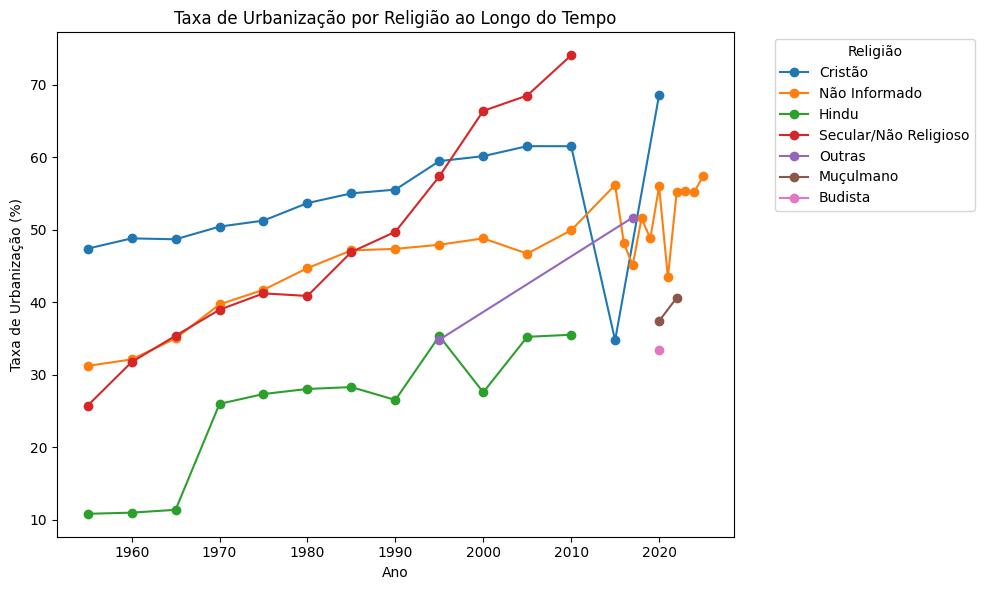

Consulta 4: Impacto de Conflitos Políticos na População


,Em_Conflito,media_pop_total,media_pop_urbana,media_pib
0,Baixo,1.988680e+07,1.010652e+07,26072.266330
1,Alto,9.922340e+07,4.026085e+07,7393.731892
2,Médio,8.157774e+07,3.340978e+07,8542.554525


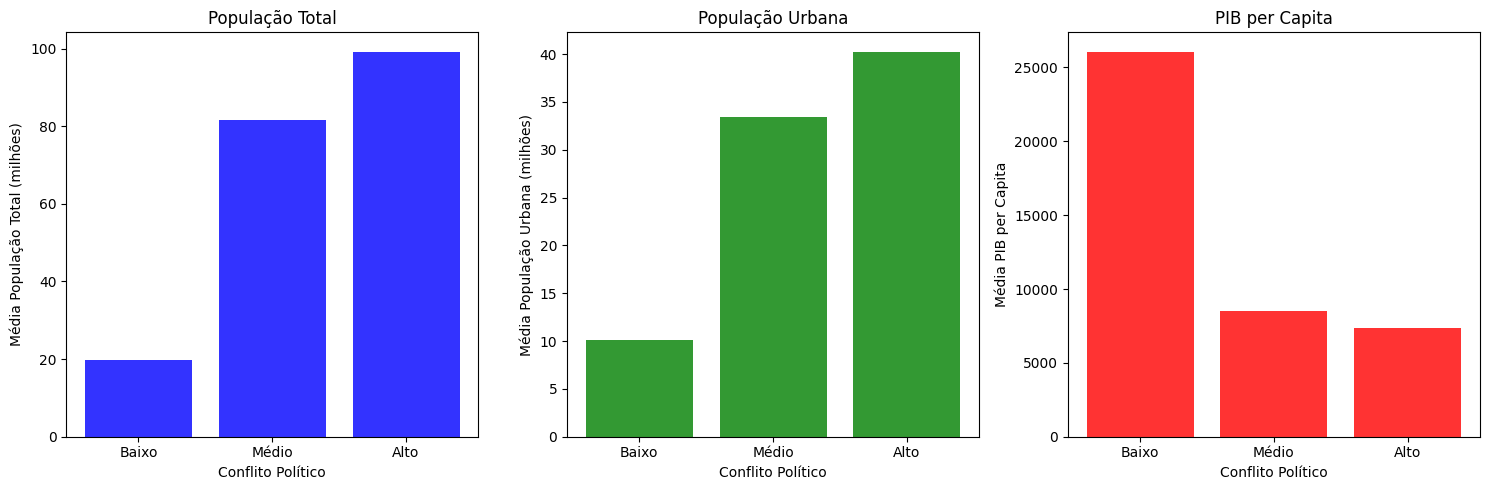

Consulta 5: Taxa de Mortalidade por Região e Religião


,Continente,Classificacao,media_mortalidade
0,Europe/Asia,Secular/Não Religioso,NaN
1,Asia,Muçulmano,1.652702e+07
2,South America,Hindu,6.994596e+05
3,Oceania,Cristão,7.577985e+06
4,Oceania,Não Informado,5.882826e+05
5,Africa,Não Informado,1.216301e+07
6,Asia,Hindu,3.895257e+08
7,Asia/Europe,Não Informado,8.086092e+06
8,Europe,Cristão,1.834125e+07
9,Africa,Cristão,1.063221e+07


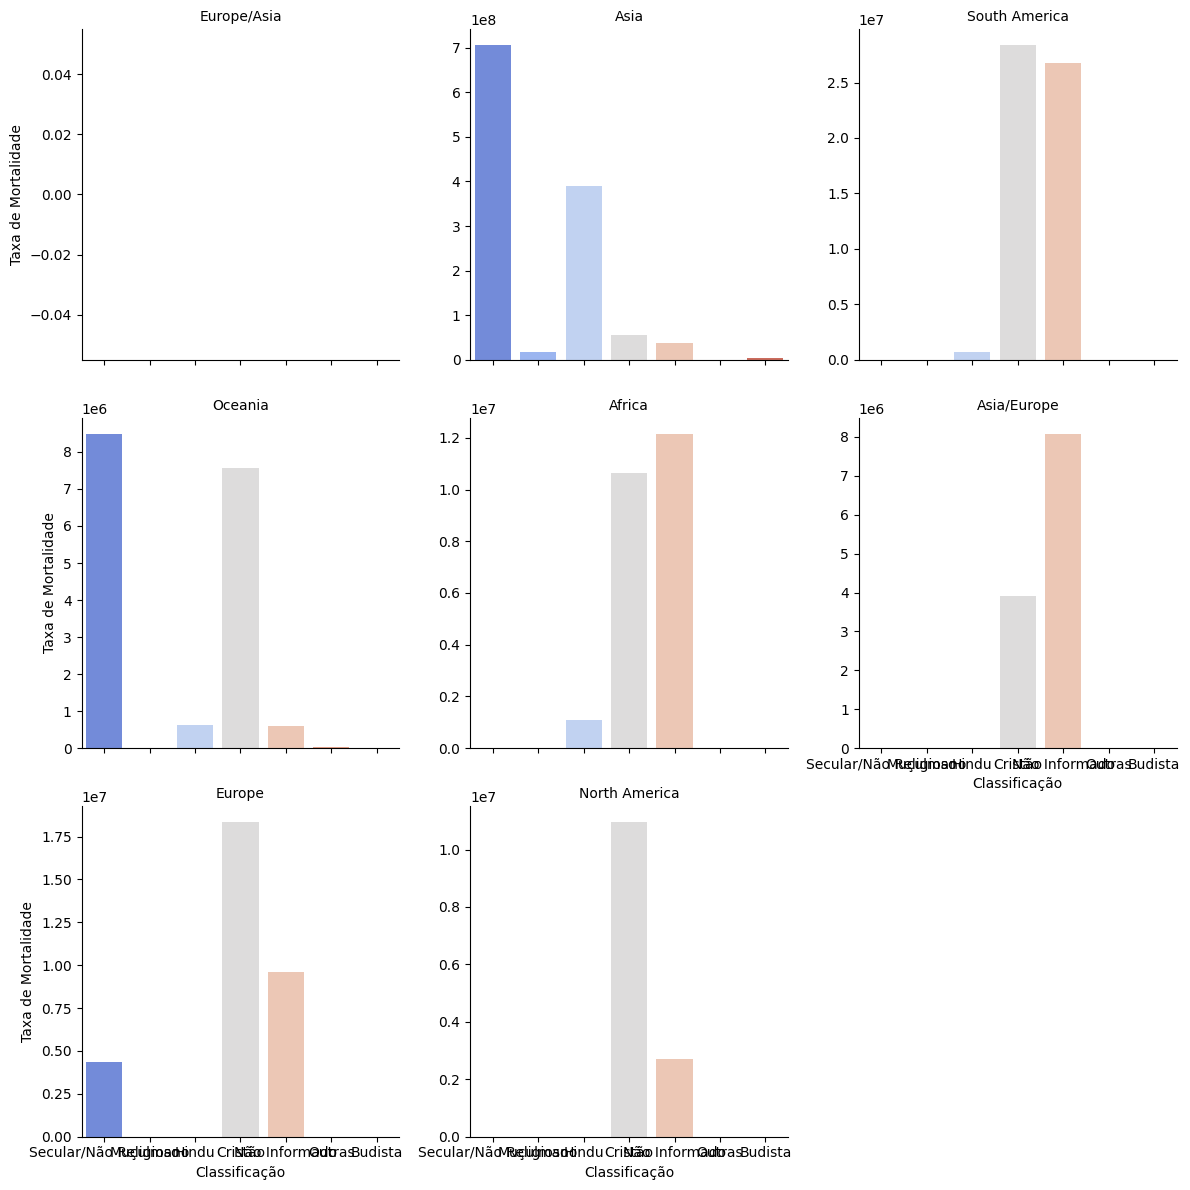

Consulta 6: PIB per Capita e Indicadores de Saúde por Religião


,Classificacao,media_pib,media_vida,media_mortalidade
0,Não Informado,23901.012520,65.533169,1.533962e+07
1,Budista,65052.746000,76.844900,4.489272e+06
2,Secular/Não Religioso,22269.518400,65.717180,4.026701e+08
3,Outras,3481.520650,65.937300,3.118466e+04
4,Cristão,22571.876137,66.380016,1.705821e+07
5,Hindu,8383.696061,59.288392,1.912097e+08
6,Muçulmano,30300.954333,76.334867,1.652702e+07


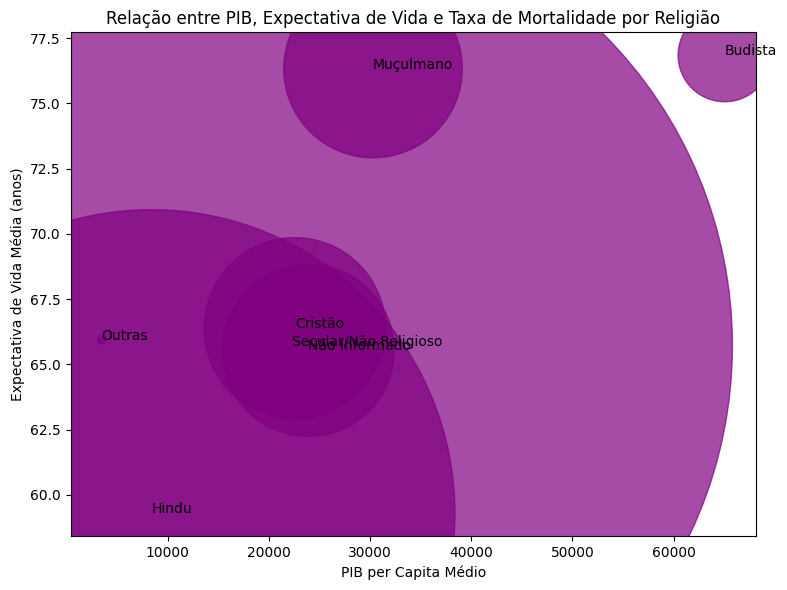

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta 1: Distribuição Religiosa e Impactos Socioeconômicos
# Objetivo: Avaliar a relação entre a predominância de determinadas religiões e indicadores como PIB per capita,
# taxa de mortalidade e expectativa de vida.
query1 = """
SELECT R."Classificacao", 
       AVG(F."PIB_Per_Capita") AS media_pib, 
       AVG(F."Expectativa_Vida") AS media_vida, 
       AVG(F."Taxa_Mortalidade") AS media_mortalidade
FROM "Fato_Populacao" F
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY R."Classificacao";
"""
df_q1 = pd.read_sql(query1, engine)
print("Consulta 1: Distribuição Religiosa e Impactos Socioeconômicos")
display(df_q1)

# Plot: três subplots para cada indicador
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x="Classificacao", y="media_pib", data=df_q1, ax=axs[0], palette="viridis")
axs[0].set_title("PIB per Capita Médio")
axs[0].set_xlabel("Religião")
axs[0].set_ylabel("PIB per Capita")
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x="Classificacao", y="media_vida", data=df_q1, ax=axs[1], palette="viridis")
axs[1].set_title("Expectativa de Vida Média")
axs[1].set_xlabel("Religião")
axs[1].set_ylabel("Expectativa de Vida (anos)")
axs[1].tick_params(axis='x', rotation=45)

sns.barplot(x="Classificacao", y="media_mortalidade", data=df_q1, ax=axs[2], palette="viridis")
axs[2].set_title("Taxa de Mortalidade Média")
axs[2].set_xlabel("Religião")
axs[2].set_ylabel("Taxa de Mortalidade")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------

# Consulta 2: Tendências Religiosas e Urbanização
# Objetivo: Examinar se há relação entre a taxa de urbanização e a distribuição de religiões ao longo do tempo.
query2 = """
SELECT T."Ano", 
       R."Classificacao", 
       AVG(CAST(F."Populacao_Urbana" AS FLOAT)/F."Populacao_Total")*100 AS urban_rate
FROM "Fato_Populacao" F
JOIN "Dim_Tempo" T ON F."Chave_Tempo" = T."ID_Tempo"
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY T."Ano", R."Classificacao"
ORDER BY T."Ano";
"""
df_q2 = pd.read_sql(query2, engine)
print("Consulta 2: Tendências Religiosas e Urbanização")
display(df_q2.head(15))

# Plot: Linha para cada religião ao longo dos anos
plt.figure(figsize=(10,6))
for relig in df_q2["Classificacao"].unique():
    dados_relig = df_q2[df_q2["Classificacao"] == relig]
    plt.plot(dados_relig["Ano"], dados_relig["urban_rate"], marker='o', label=relig)
plt.title("Taxa de Urbanização por Religião ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Taxa de Urbanização (%)")
plt.legend(title="Religião", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------

# Consulta 4: Impacto de Conflitos Políticos na População
# Objetivo: Analisar como situações de conflito político afetam métricas como população total, urbanização e PIB per capita.
# Consulta 4: Impacto de Conflitos Políticos na População
# Objetivo: Analisar como situações de conflito político afetam métricas como população total, urbanização e PIB per capita.

# Consulta 4: Impacto de Conflitos Políticos na População
# Objetivo: Analisar como situações de conflito político afetam métricas como população total, urbanização e PIB per capita.
query4 = """
SELECT F."Em_Conflito", 
       AVG(F."Populacao_Total") AS media_pop_total, 
       AVG(F."Populacao_Urbana") AS media_pop_urbana, 
       AVG(F."PIB_Per_Capita") AS media_pib
FROM "Fato_Populacao" F
GROUP BY F."Em_Conflito";
"""
df_q4 = pd.read_sql(query4, engine)
print("Consulta 4: Impacto de Conflitos Políticos na População")
display(df_q4)

# Reordena os dados para garantir a ordem desejada: Baixo, Médio, Alto
ordem = ['Baixo', 'Médio', 'Alto']
df_q4 = df_q4.set_index('Em_Conflito').reindex(ordem).reset_index()

# Cria a figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Média da População Total (em milhões) por Conflito
axes[0].bar(df_q4['Em_Conflito'], df_q4['media_pop_total'] / 1e6, color='b', alpha=0.8)
axes[0].set_xlabel('Conflito Político')
axes[0].set_ylabel('Média População Total (milhões)')
axes[0].set_title('População Total')

# Plot 2: Média da População Urbana (em milhões) por Conflito
axes[1].bar(df_q4['Em_Conflito'], df_q4['media_pop_urbana'] / 1e6, color='g', alpha=0.8)
axes[1].set_xlabel('Conflito Político')
axes[1].set_ylabel('Média População Urbana (milhões)')
axes[1].set_title('População Urbana')

# Plot 3: Média do PIB per Capita por Conflito (escala original)
axes[2].bar(df_q4['Em_Conflito'], df_q4['media_pib'], color='r', alpha=0.8)
axes[2].set_xlabel('Conflito Político')
axes[2].set_ylabel('Média PIB per Capita')
axes[2].set_title('PIB per Capita')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------

# Consulta 5: Taxa de Mortalidade por Região e Religião
query5 = """
SELECT L."Continente", 
       R."Classificacao", 
       AVG(F."Taxa_Mortalidade") AS media_mortalidade
FROM "Fato_Populacao" F
JOIN "Dim_Local" L ON F."Chave_Local" = L."ID_Local"
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY L."Continente", R."Classificacao";
"""
df_q5 = pd.read_sql(query5, engine)
print("Consulta 5: Taxa de Mortalidade por Região e Religião")
display(df_q5)

# Cria um gráfico de barras para cada continente dispostos em um grid, com escalas independentes
g = sns.catplot(
    data=df_q5,
    x="Classificacao",
    y="media_mortalidade",
    col="Continente",
    kind="bar",
    palette="coolwarm",
    col_wrap=3,    # Número de colunas no grid
    height=4, 
    aspect=1,
    sharey=False  # Cada gráfico terá sua própria escala no eixo y
)

g.set_axis_labels("Classificação", "Taxa de Mortalidade")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------

# Consulta 6: PIB per Capita e Indicadores de Saúde por Religião
# Objetivo: Comparar o PIB per capita com indicadores de saúde (Expectativa de Vida e Taxa de Mortalidade) por religião.
query6 = """
SELECT R."Classificacao", 
       AVG(F."PIB_Per_Capita") AS media_pib, 
       AVG(F."Expectativa_Vida") AS media_vida, 
       AVG(F."Taxa_Mortalidade") AS media_mortalidade
FROM "Fato_Populacao" F
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY R."Classificacao";
"""
df_q6 = pd.read_sql(query6, engine)
print("Consulta 6: PIB per Capita e Indicadores de Saúde por Religião")
display(df_q6)

# Plot: Scatter plot com PIB no eixo x, Expectativa de Vida no eixo y e tamanho da bolha proporcional à Taxa de Mortalidade
plt.figure(figsize=(8,6))
plt.scatter(df_q6['media_pib'], df_q6['media_vida'], s=df_q6['media_mortalidade']*0.001, alpha=0.7, color='purple')
for i, relig in enumerate(df_q6['Classificacao']):
    plt.text(df_q6['media_pib'][i], df_q6['media_vida'][i], relig, fontsize=10)
plt.xlabel("PIB per Capita Médio")
plt.ylabel("Expectativa de Vida Média (anos)")
plt.title("Relação entre PIB, Expectativa de Vida e Taxa de Mortalidade por Religião")
plt.tight_layout()
plt.show()
